# Mission Dotlas 🌎 (40 points)

![Dotlas](https://camo.githubusercontent.com/6a3a3a9e55ce6b5c4305badbdc68c0d5f11b360b11e3fa7b93c822d637166090/68747470733a2f2f646f746c61732d776562736974652e73332e65752d776573742d312e616d617a6f6e6177732e636f6d2f696d616765732f6769746875622f62616e6e65722e706e67)

### 1.1 Overview ✉️

Welcome to your mission! In this notebook, you will download a dataset containing restaurants' information in the state of California, US. The dataset will then be transformed, processed and prepared in a required format. This clean dataset will then be used to answer some analytical questions and create a few data visualizations in Python.

This is a template notebook that has some code already filled-in to help you on your way. There are also cells that require you to fill in the python code to solve specific problems. There are sections of the notebook that contain a points tally for code written. 

**Each section of this notebook is largely independent, so if you get stuck on a problem you can always move on to the next one.**

### 1.2 Tools & Technologies 🪛

- This exercise will be carried out using the [Python](https://www.python.org/) programming language and will rely hevily on the [Pandas](https://pandas.pydata.org/) library for data manipulation.
- You may use any of [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) or [Plotly](https://plotly.com/python/) packages for data visualization.
- We will be using [Jupyter notebooks](https://jupyter.org/) to run Python code in order to view and interact better with our data and visualizations.
- You are free to use [Google Colab](https://colab.research.google.com/) which provides an easy-to-use Jupyter interface.
- When not in Colab, it is recommended to run this Jupyter Notebook within an [Anaconda](https://continuum.io/) environment
- You can use any other Python packages that you deem fit for this project.

> ⚠ **Ensure that your Python version is 3.9 or higher**

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Blue_Python_3.9_Shield_Badge.svg)

**Language**

![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54)

**Environments & Packages**

![Anaconda](https://img.shields.io/badge/Anaconda-%2344A833.svg?style=for-the-badge&logo=anaconda&logoColor=white)
![Jupyter Notebook](https://img.shields.io/badge/jupyter-%23FA0F00.svg?style=for-the-badge&logo=jupyter&logoColor=white)
![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-%23ffffff.svg?style=for-the-badge&logo=Matplotlib&logoColor=black)
![Plotly](https://img.shields.io/badge/Plotly-%233F4F75.svg?style=for-the-badge&logo=plotly&logoColor=white)

**Data Store**

![AWS](https://img.shields.io/badge/AWS-%23FF9900.svg?style=for-the-badge&logo=amazon-aws&logoColor=white)

---

### 2.1 Read California Restaurants 🔍 (3 points)

In this section, we will load the dataset from [AWS](https://googlethatforyou.com?q=amazon%20web%20services), conduct an exploratory data analysis and then clean up the dataset


- Ensure that pandas and plotly are installed (possibly via pip or poetry)
- The dataset is about 300 MB in size and time-to-download depends on internet speed and availability
- Download the dataset using Python into this notebook and load it into a pandas dataframe (without writing to file)


In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import plotly.express as px
import numpy as np

CELL_HEIGHT: int = 50

pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_colwidth', CELL_HEIGHT)

DATA_URL: str = "https://dotlas-marketing.s3.amazonaws.com/interviews/california_restaurants.json"

In [2]:
import urllib, json


response = urllib.request.urlopen(DATA_URL)

data = json.loads(response.read())

print (data[:1])

[{'country': 'United States', 'subregion': 'California', 'city': 'Los Angeles', 'brand_name': 'Luv2Eat Thai Bistro', 'categories': ['Thai'], 'latitude': 34.09751, 'longitude': -118.335921, 'area': 'Hollywood', 'address': '6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90028-7178, United States', 'menu': [{'name': 'Main Menu', 'sections': [{'name': 'Appetizers', 'items': [{'name': 'Egg Rolls', 'price': {'value': 8.0, 'currency_code': 'USD'}, 'description': 'Deep fried mixed veggie egg rolls served with sweet & sour sauce'}, {'name': 'Fried Tofu', 'price': {'value': 8.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut'}, {'name': 'Fried Meat Balls', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': 'Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork'}, {'name': 'Pork Jerky', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'descriptio

In [3]:
from pandas.io.json import json_normalize

In [4]:
df = pd.json_normalize(data,max_level=0) 
df.shape

(18316, 43)

In [113]:
%%time
# ✏️ YOUR CODE HERE
# df: pd.DataFrame = ?

CPU times: total: 0 ns
Wall time: 0 ns


Create a restaurant ID column to uniquely index each restaurant


In [114]:
df["restaurant_id"] = range(1, len(df) + 1)
df.head(2)

country   subregion          city           brand_name  categories  \
0  United States  California   Los Angeles  Luv2Eat Thai Bistro      [Thai]   
1  United States  California  Sherman Oaks  Jerry's Famous Deli  [American]   

    latitude   longitude          area  \
0  34.097510 -118.335921     Hollywood   
1  34.154596 -118.448700  Sherman Oaks   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  <p>Feast on delicious grub at Jerry's Famous D...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   

  primary_cuisine   dining_style executive_chef_name    parking_info  \
0            Thai  Casual Dining                None  Street Parking   
1        American  Casual Dining                None            None   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90     4.6           136   
1                                    90     0.0             0   

                                   rating_by_feature rating_distribution  \
0  {'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...  [2, 3, 4, 23, 104]   
1  {'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...     [0, 0, 0, 0, 0]   

   review_count                      review_topics awards experiences  \
0            18  [Spicy, Casual, Neighborhood Gem]     []          []   
1             0                                 []     []          []   

                                                tags editorial_lists  \
0  [Delivery, Gluten-free Options, Late Night, No...              []   
1                                                 []              []   

                                           checklist  \
0  {'bar': False, 'counter': False, 'gifting': No...   
1  {'bar': None, 'counter': None, 'gifting': None...   

                                  safety_precautions order_online_link  \
0  {'cleanMenus': None, 'limitedSeating': None, '...              None   
1  {'cleanMenus': None, 'limitedSeating': None, '...              None   

                                     facebook  \
0  http://www.facebook.com/luv2eatthaibistro/   
1                                        None   

                                    menu_url popular_dishes  \
0  http://sappclub.com/restaurant.aspx?r=205             []   
1                                       None             []   

   daily_reservation_count  restaurant_id  
0                      NaN              1  
1                      NaN              2

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               18316 non-null  object 
 1   subregion                             18316 non-null  object 
 2   city                                  18316 non-null  object 
 3   brand_name                            18316 non-null  object 
 4   categories                            18316 non-null  object 
 5   latitude                              18316 non-null  float64
 6   longitude                             18316 non-null  float64
 7   area                                  18316 non-null  object 
 8   address                               10003 non-null  object 
 9   menu                                  16529 non-null  object 
 10  description                           18316 non-null  object 
 11  public_transit 

### 2.2 Basic Operations 🔧 (4 points)

#### 2.2.1 Restaurants by City 🌆 (1 point)

For each city in california, find

1. the number of restaurants in that city,
2. mean `rating` of all restaurants in the city,
3. mean `price_range_id` per city,
4. mean `maximum_days_advance_for_reservation` per city

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| city          | restaurant_count | avg_rating | avg_price_range_id | avg_reservation_advance |
| :------------ | ---------------: | ---------: | -----------------: | ----------------------: |
| San Francisco |             1645 |    2.59343 |             2.3617 |                 90.3453 |
| Los Angeles   |             1604 |    2.31995 |            2.29052 |                  86.692 |
| San Diego     |             1034 |    2.65493 |            2.28723 |                 94.5783 |
| San Jose      |              372 |    1.54597 |            2.16398 |                 88.3011 |
| Sacramento    |              329 |    1.68663 |            2.26748 |                 95.0274 |


In [116]:
# ✏️ YOUR CODE HERE

In [117]:
q1=df.groupby('city')['restaurant_id'].count()
q1=pd.DataFrame(q1)
q1['restaurant_count']=q1['restaurant_id']
q1=q1.drop('restaurant_id',axis=1)

In [118]:
q1['avg_rating']=df.groupby('city')['rating'].mean()

In [119]:
q1['avg_price_range_id']=df.groupby('city')['price_range_id'].mean()

In [120]:
q1['avg_reservation_advance']=df.groupby('city')['maximum_days_advance_for_reservation'].mean()

In [121]:
q1=q1.sort_values('restaurant_count',ascending=False)
q1['avg_rating']=round(q1['avg_rating'],5)
q1[['avg_price_range_id','avg_reservation_advance']]=round(q1[['avg_price_range_id','avg_reservation_advance']],4)
q1.head(5)

restaurant_count  avg_rating  avg_price_range_id  \
city                                                              
San Francisco              1645     2.59343              2.3617   
Los Angeles                1604     2.31995              2.2905   
San Diego                  1034     2.65493              2.2872   
San Jose                    372     1.54597              2.1640   
Sacramento                  329     1.68663              2.2675   

               avg_reservation_advance  
city                                    
San Francisco                  90.3453  
Los Angeles                    86.6920  
San Diego                      94.5783  
San Jose                       88.3011  
Sacramento                     95.0274

#### 2.2.2 Restaurants by Brand 🍔 (1 point)

For each brand (`brand_name`) in california, find

1. the number of restaurants that belong to that brand,
2. mean `price_range_id` of the brand across its restaurants

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| brand_name               | restaurant_count | avg_price_range_id |
| :----------------------- | ---------------: | -----------------: |
| Denny's                  |               73 |                  2 |
| Ihop                     |               37 |                  2 |
| Buffalo Wild Wings       |               32 |                  2 |
| Black Bear Diner         |               28 |                  2 |
| Coco's Bakery Restaurant |               24 |                  2 |


In [122]:
# ✏️ YOUR CODE HERE

In [123]:
q2=pd.DataFrame(df.groupby('brand_name')['restaurant_id'].count())
q2['restaurant_count']=q2['restaurant_id']
q2=q2.drop('restaurant_id',axis=1)

In [124]:
q2['avg_price_range_id']=df.groupby('brand_name')['price_range_id'].mean()
q2.sort_values('restaurant_count',ascending=False,inplace=True)

In [125]:
q2['avg_price_range_id']=q2['avg_price_range_id'].astype('int64')

In [126]:
q2.head(5)

restaurant_count  avg_price_range_id
brand_name                                                    
Denny's                                 73                   2
Ihop                                    37                   2
Buffalo Wild Wings                      32                   2
Black Bear Diner                        28                   2
Coco's Bakery Restaurant                24                   2

#### 2.2.3 Visualize Brands 📊 (2 points)

Create a bar chart of top 5 brands in california by average number of reviews where each brand has at least 5 restaurants


In [127]:
# ✏️ YOUR CODE HERE

In [128]:
g=pd.DataFrame(df.groupby('brand_name')['review_count'].mean())
g['name']=g.index
g.sort_values('review_count')
g['count']=df.groupby('brand_name')['restaurant_id'].count()

In [129]:
f=g[g['count']>=5]
f=f.sort_values('review_count',ascending=False)

In [130]:
f=f.head(5)
f

review_count  \
brand_name                                             
Ruby's Diner                                0.833333   
Crepevine                                   0.400000   
Amici's East Coast Pizzeria                 0.222222   
Mikuni Japanese Restaurant & Sushi Bar      0.200000   
Urban Plates                                0.200000   

                                                                          name  \
brand_name                                                                       
Ruby's Diner                                                      Ruby's Diner   
Crepevine                                                            Crepevine   
Amici's East Coast Pizzeria                        Amici's East Coast Pizzeria   
Mikuni Japanese Restaurant & Sushi Bar  Mikuni Japanese Restaurant & Sushi Bar   
Urban Plates                                                      Urban Plates   

                                        count  
brand_name                                     
Ruby's Diner                                6  
Crepevine                                   5  
Amici's East Coast Pizzeria                 9  
Mikuni Japanese Restaurant & Sushi Bar      5  
Urban Plates                                5

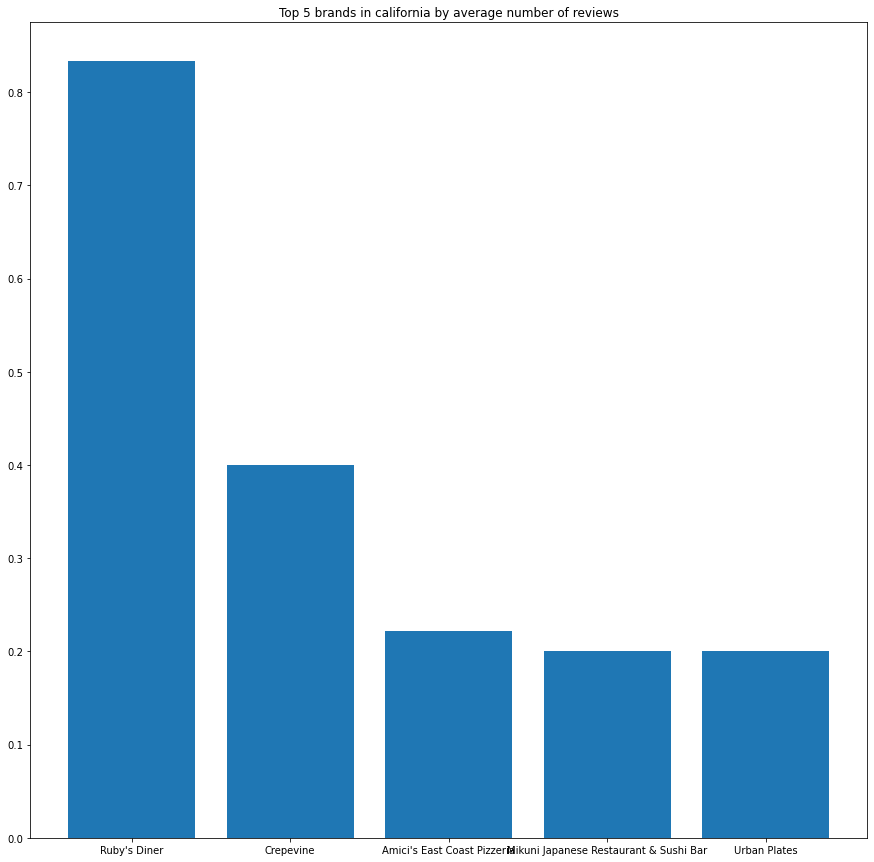

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.bar(f['name'],f['review_count'])
plt.title('Top 5 brands in california by average number of reviews')
plt.show()

In [132]:
px.bar(f['name'],f['review_count'],color=f['name'])

### 2.3 Transform Columns 🚚 (15 Points)

<img src="https://media.giphy.com/media/2f41Z7bhKGvbG/giphy.gif" height="250px" width="250px" alt="harry potter">

#### 2.3.1 Safety Precautions 🦺 (2 points)

Transform the entire safety precautions column into a new column based on the following rule:

Convert from dictionary to list. Only include in the list, those keys in the dictionary which are true.
For ex, for safety precautions of the type:

```python
{
    'cleanMenus': True,
    'limitedSeating': False,
    'sealedUtensils': None,
    'prohibitSickStaff': True,
    'requireDinerMasks': True,
    'staffIsVaccinated': None,
    'proofOfVaccinationRequired': False,
    'sanitizerProvidedForCustomers': None
}
```

It should turn into a list of the form:

```python
["Clean Menus", "Prohibit Sick Staff", "Require Diner Masks"]
```


In [103]:
# ✏️ YOUR CODE HERE

In [5]:
df_temp=pd.json_normalize(data,max_level=5)
df_temp.shape

(18316, 77)

In [28]:
df_temp.head(1)

country   subregion         city           brand_name categories  \
0  United States  California  Los Angeles  Luv2Eat Thai Bistro     [Thai]   

   latitude   longitude       area  \
0  34.09751 -118.335921  Hollywood   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   

  cross_street           restaurant_website    phone_number primary_cuisine  \
0         None  http://www.luv2eatthai.com/  (323) 498-5835            Thai   

    dining_style executive_chef_name    parking_info    dress_code  \
0  Casual Dining                None  Street Parking  Casual Dress   

  entertainment                                    operating_hours  \
0          None  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...   

   price_range_id    price_range                     payment_options  \
0               2  $30 and under  [AMEX, Discover, MasterCard, Visa]   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90     4.6           136   

  rating_distribution  review_count                      review_topics awards  \
0  [2, 3, 4, 23, 104]            18  [Spicy, Casual, Neighborhood Gem]     []   

  experiences                                               tags  \
0          []  [Delivery, Gluten-free Options, Late Night, No...   

  editorial_lists order_online_link  \
0              []              None   

                                     facebook  \
0  http://www.facebook.com/luv2eatthaibistro/   

                                    menu_url popular_dishes  \
0  http://sappclub.com/restaurant.aspx?r=205             []   

   daily_reservation_count  rating_by_feature.food  rating_by_feature.noise  \
0                      NaN                     4.7                      2.0   

   rating_by_feature.value  rating_by_feature.service  \
0                      4.6                        4.3   

   rating_by_feature.ambience checklist.bar checklist.counter  \
0                         3.7         False             False   

  checklist.gifting checklist.waitlist checklist.has_pickup  \
0              None              False                 None   

   checklist.has_takeout checklist.waitlist_only  checklist.private_dining  \
0                   True                    True                     False   

  checklist.outdoor_seating checklist.high_top_seating  \
0                     False                      False   

  checklist.priority_seating checklist.permanently_closed  \
0                       None                        False   

  checklist.network_non_bookable  checklist.has_delivery_partners  \
0                           None                            False   

  safety_precautions.cleanMenus safety_precautions.limitedSeating  \
0                          None                              None   

  safety_precautions.sealedUtensils safety_precautions.prohibitSickStaff  \
0                              None                                 None   

  safety_precautions.requireDinerMasks safety_precautions.sanitizedSurfaces  \
0                                 None                                 None   

  safety_precautions.staffIsVaccinated safety_precautions.commonAreaCleaning  \
0                                 None                                  None   

  safety_precautions.contactlessPayment  \
0                                  None   

  safety_precautions.commonAreaDistancing  \
0                                    None   

  safety_precautions.requireWaitstaffMasks  \
0                                     None   

  safety_precautions.contactTracingCollected  \
0                                       None   

  safety_precautions.dinerTempChecksRe

In [29]:
df_o=df_temp.filter(regex='^safety_precautions', axis="columns")

In [30]:
df_o=df_o.astype('str')

In [31]:
df_o=df_o.where(df_o != 'True', df_o.columns.to_series(), axis=1)

In [32]:
df_o=df_o.astype('str')

In [33]:
df_o=df_o.replace('False','')

In [34]:
df_o=df_o.replace('None','')

In [35]:
def join_columns(X: pd.DataFrame):
    separator = ','
    col_name = 'Combine'
    for i, c in enumerate(X.columns):
        if i == 0:
            X_out = X[c].copy()
        else:
            X_out += separator + X[c]
    return X_out.to_frame(name=col_name)

In [36]:
df_o=df_o.astype('str')

In [37]:
g=join_columns(df_o)

In [38]:
g['Combine']=g['Combine'].str.replace('safety_precautions.','')

C:\Users\HP\AppData\Local\Temp\ipykernel_7548\909378150.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  g['Combine']=g['Combine'].str.replace('safety_precautions.','')


In [39]:
g['Combine'].str.split(',')

0                     [, , , , , , , , , , , , , , , , , ]
1                     [, , , , , , , , , , , , , , , , , ]
2                     [, , , , , , , , , , , , , , , , , ]
3                     [, , , , , , , , , , , , , , , , , ]
4        [cleanMenus, , , prohibitSickStaff, requireDin...
                               ...                        
18311                 [, , , , , , , , , , , , , , , , , ]
18312                 [, , , , , , , , , , , , , , , , , ]
18313                 [, , , , , , , , , , , , , , , , , ]
18314                 [, , , , , , , , , , , , , , , , , ]
18315                 [, , , , , , , , , , , , , , , , , ]
Name: Combine, Length: 18316, dtype: object

In [40]:
g['Combine']=g['Combine'].str.split(',')

In [41]:
def filtera(list1):
    return list(filter(None,list1))

In [42]:
g['Combine']=g['Combine'].map(filtera)

In [43]:
df['safety_precautions']=g['Combine']

In [44]:
df.safety_precautions = df.safety_precautions.apply(lambda y: np.nan if len(y)==0 else y)

In [46]:
df[df['safety_precautions'].notnull()]['safety_precautions'].head(5)

4     [cleanMenus, prohibitSickStaff, requireDinerMa...
15    [cleanMenus, sanitizedSurfaces, commonAreaClea...
17    [prohibitSickStaff, sanitizedSurfaces, commonA...
23    [cleanMenus, limitedSeating, prohibitSickStaff...
24    [cleanMenus, limitedSeating, sealedUtensils, p...
Name: safety_precautions, dtype: object

#### 2.3.2 Clean up HTML text 🥜 (2 points)

Find columns containing text / strings that have html text and remove those HTML texts

ex:

```html
<p>
  Feast on delicious grub at Jerry's Famous Deli.<br />
  Its retro-style casual setting features comfortable booth seating.
</p>
```

to:

```
Feast on delicious grub at Jerry's Famous Deli. Its retro-style casual setting features comfortable booth seating.
```


In [33]:
# ✏️ YOUR CODE HERE

In [160]:
from bs4 import BeautifulSoup

In [161]:
df['description'].map(lambda text: BeautifulSoup(text, 'html.parser').get_text()).replace('\n','').replace('\r','')

C:\Users\HP\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

C:\Users\HP\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



0        Luv2Eat Thai Bistro is located in Los Angeles,...
1        Feast on delicious grub at Jerry's Famous Deli...
2        Terrace Sushi serves Japanese cuisines to its ...
3        Hamburger Hamlet serves traditional American c...
4        WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY. PLEA...
                               ...                        
18311                                         Coming Soon!
18312                                         Coming Soon!
18313    ThirstyBear is the first & only Certified Orga...
18314    Welcome to Bua Thai Kitchen - Sausalito, CA. W...
18315    The Original Chulada Grill is a restaurant spe...
Name: description, Length: 18316, dtype: object

In [162]:
df['description']=df['description'].map(lambda text: BeautifulSoup(text, 'html.parser').get_text()).replace('\n','').replace('\r','')

In [163]:
df['description'].head(5)

0    Luv2Eat Thai Bistro is located in Los Angeles,...
1    Feast on delicious grub at Jerry's Famous Deli...
2    Terrace Sushi serves Japanese cuisines to its ...
3    Hamburger Hamlet serves traditional American c...
4    WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY. PLEA...
Name: description, dtype: object

#### 2.3.3 Imputing 📈 (3 points)

Fill up missing values for rating, rating count and review count by imputing based on the following columns in order:

1. `brand_name`
2. `area`
3. `city`

This means that if `rating` is missing for a restaurant (null / 0), but that restaurant is part of a brand where
other restaurants of the same brand have ratings, then a median rating is taken. If brands are complete, then missing values are filled using
area where the restaurant is located (median rating) and finally filled using the city's rating

Here's an example:

|restaurant_id	|brand_name|	area|	city|	rating|	imputed_rating_brand | imputed_rating_area| imputed_rating_city
| --- | --- | --- | --- | --- | --- | --- | --- |
|1	|X1|	A1|	B1|	3|	3| 3 | 3 |
|2	|X1|	A1|	B1|	2|	2| 2 | 2 |
|3	|X1|	A1|	B1|	| 2.5| 2.5 | 2.5 |
|4	|X2|	A1|	B1|	4|	4 | 4 | 4 |
|5	|X3|	A1|	B1|	|	 | 2.75 | 2.75 |
|6	|X4|	A4|	B2|	|	 | | 3 |
|7	|X5|	A6|	B2|	2|	 2| 2| 2|
|8	|X6|	A7|	B2|	4|	 4| 4| 4 |


In [164]:
# ✏️ YOUR CODE HERE

In [165]:
df_=df[['restaurant_id','brand_name','area','city','rating']]

In [166]:
import numpy as np
df_['rating']=df_['rating'].replace(0,np.nan)

In [167]:
df.groupby('brand_name')['rating'].transform('median')

0        4.6
1        0.0
2        0.0
3        0.0
4        4.7
        ... 
18311    0.0
18312    0.0
18313    3.9
18314    4.5
18315    0.0
Name: rating, Length: 18316, dtype: float64

In [168]:
df_['imputed_rating_brand']=df_['rating'].fillna(df_.groupby('brand_name')['rating'].transform('median'))

In [169]:
df_['imputed_rating_area']=df_['rating'].fillna(df_.groupby('area')['rating'].transform('median'))

In [170]:
df_['imputed_rating_city']=df_['rating'].fillna(df_.groupby('city')['rating'].transform('median'))

In [171]:
df_=df_.set_index('restaurant_id')

In [172]:
df_=df_.replace(np.nan,'')
df_

brand_name  \
restaurant_id                                
1                      Luv2Eat Thai Bistro   
2                      Jerry's Famous Deli   
3                            Terrace Sushi   
4              Hamburger Hamlet - Pasadena   
5                       Centanni - Burbank   
...                                    ...   
18312                           Crema Cafe   
18313                       Dynasty Garden   
18314                         Thirsty Bear   
18315                     Bua Thai Kitchen   
18316           The Original Chulada Grill   

                                                          area           city  \
restaurant_id                                                                   
1                                                    Hollywood    Los Angeles   
2                                                 Sherman Oaks   Sherman Oaks   
3                                                     Pasadena       Pasadena   
4                                                     Pasadena       Pasadena   
5                                                      Burbank        Burbank   
...                                                        ...            ...   
18312          Huntington Beach / Seal Beach / Fountain Valley     Seal Beach   
18313                                                  Modesto        Modesto   
18314                                                     SOMA  San Francisco   
18315                                                Sausalito      Sausalito   
18316                                             Mid-Wilshire    Los Angeles   

              rating imputed_rating_brand imputed_rating_area  \
restaurant_id                                                   
1                4.6                  4.6                 4.6   
2                                                         4.3   
3                                                         4.4   
4                                                         4.4   
5                4.7                  4.7                 4.7   
...              ...                  ...                 ...   
18312                                                     4.4   
18313                                                    4.55   
18314            3.9                  3.9                 3.9   
18315            4.5                  4.5                 4.5   
18316                                                     4.2   

              imputed_rating_city  
restaurant_id                      
1                             4.6  
2                             4.4  
3                             4.4  
4                             4.4  
5                             4.7  
...                           ...  
18312                         4.4  
18313                         4.6  
18314                         3.9  
18315                         4.5  
18316                         4.4  

[18316 rows x 7 columns]

#### 2.3.4 Analytical Transformations (8 points)

Choose any one sub-section only to answer. The choice is yours

<img src="https://media.giphy.com/media/SCt3Miv6ugvSg/giphy.gif" height="250px" width="250px" alt="the matrix">


##### 2.3.4a Operating Hours 🕰️

Create an operating hours [bitmap](https://en.wikipedia.org/wiki/Bit_array) column from the operating hours text column for all restaurants. The bitmap would be a matrix of size 24 x 7 where a 1 or 0 on each cell indicates whether the restaurant is operating on a specific day at a specific hour

Example: For operating hours text of the form:

```tex
Lunch
Daily 11:00 am–3:30 pm
Dinner
Daily 4:30 pm–11:30 pm
```

Create a bitmap of the following form:

```json
{
    "Monday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    "Tuesday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    .
    .
    .
    "Sunday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],

}
```


In [173]:
# ✏️ YOUR CODE HERE

##### 2.3.4b On my radar 🗺️

For the following restaurant:

- brand_name `Calzone's Pizza Cucina`
- coordinates `37.799068, -122.408226`.

Answer these questions:

- How many restaurants exist within a 100 meter radius of this restaurant?
- What is the most frequent cuisine (`category`) occurence in this 100m radius across the restaurants that exist in that range?

In [174]:
df_c=df.rename(columns = {'lat':'latitude','lon':'longitude'})

In [175]:
df_n=df_c.iloc[:,1:17]
df_n.head(5)

subregion          city                   brand_name  \
0  California   Los Angeles          Luv2Eat Thai Bistro   
1  California  Sherman Oaks          Jerry's Famous Deli   
2  California      Pasadena                Terrace Sushi   
3  California      Pasadena  Hamburger Hamlet - Pasadena   
4  California       Burbank           Centanni - Burbank   

                categories   latitude   longitude          area  \
0                   [Thai]  34.097510 -118.335921     Hollywood   
1               [American]  34.154596 -118.448700  Sherman Oaks   
2                [Spanish]  34.145800 -118.142900      Pasadena   
3  [Contemporary American]  34.137800 -118.132300      Pasadena   
4                [Italian]  34.174018 -118.317323       Burbank   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   
2  443 E Colorado Blvd, , CA, Pasadena, 91101, Un...   
3  214 S Lake Ave, , CA, Pasadena, 91101, United ...   
4  117 N. Victory Blvd, , CA, Burbank, 91502, Uni...   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   
2  [{'name': 'Main Menu', 'sections': [{'name': '...   
3  [{'name': 'Main Menu', 'sections': [{'name': '...   
4  [{'name': 'Main Menu', 'sections': [{'name': '...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  Feast on delicious grub at Jerry's Famous Deli...           None   
2  Terrace Sushi serves Japanese cuisines to its ...           None   
3  Hamburger Hamlet serves traditional American c...           None   
4  WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY. PLEA...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   
2         None                              None  (626) 584-0503   
3         None                              None  (626) 449-8520   
4        Clark        http://www.centannila.com/  (818) 561-4643   

         primary_cuisine   dining_style  
0                   Thai  Casual Dining  
1               American  Casual Dining  
2                Spanish  Casual Dining  
3  Contemporary American  Casual Dining  
4                Italian  Casual Dining

In [176]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [-122.408226,37.799068, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6371* c
    return km

In [177]:
df_n['distance'] = df_n.apply(
    lambda row: haversine(row['longitude'], row['latitude']), 
    axis=1)
# To check the data frame if it has a new column of hotel name (for each and every member's location in the list)
df_n.head(5)

subregion          city                   brand_name  \
0  California   Los Angeles          Luv2Eat Thai Bistro   
1  California  Sherman Oaks          Jerry's Famous Deli   
2  California      Pasadena                Terrace Sushi   
3  California      Pasadena  Hamburger Hamlet - Pasadena   
4  California       Burbank           Centanni - Burbank   

                categories   latitude   longitude          area  \
0                   [Thai]  34.097510 -118.335921     Hollywood   
1               [American]  34.154596 -118.448700  Sherman Oaks   
2                [Spanish]  34.145800 -118.142900      Pasadena   
3  [Contemporary American]  34.137800 -118.132300      Pasadena   
4                [Italian]  34.174018 -118.317323       Burbank   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   
2  443 E Colorado Blvd, , CA, Pasadena, 91101, Un...   
3  214 S Lake Ave, , CA, Pasadena, 91101, United ...   
4  117 N. Victory Blvd, , CA, Burbank, 91502, Uni...   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   
2  [{'name': 'Main Menu', 'sections': [{'name': '...   
3  [{'name': 'Main Menu', 'sections': [{'name': '...   
4  [{'name': 'Main Menu', 'sections': [{'name': '...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  Feast on delicious grub at Jerry's Famous Deli...           None   
2  Terrace Sushi serves Japanese cuisines to its ...           None   
3  Hamburger Hamlet serves traditional American c...           None   
4  WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY. PLEA...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   
2         None                              None  (626) 584-0503   
3         None                              None  (626) 449-8520   
4        Clark        http://www.centannila.com/  (818) 561-4643   

         primary_cuisine   dining_style    distance  
0                   Thai  Casual Dining  551.044520  
1               American  Casual Dining  539.486118  
2                Spanish  Casual Dining  558.745909  
3  Contemporary American  Casual Dining  560.060057  
4                Italian  Casual Dining  545.730339

In [178]:
q234=df_n[df_n['distance']<=0.1]
print("The number of restaurants within a 100 meter radius of Calzone's Pizza Cucina are ",len(q234))

The number of restaurants within a 100 meter radius of Calzone's Pizza Cucina are  21


In [179]:
print('The most frequent  cuisine occurence in this 100m radius is ',q234['categories'].mode()[0])

The most frequent  cuisine occurence in this 100m radius is  ['Italian']


In [180]:
# ✏️ YOUR CODE HERE

---

Remember to hydrate and 

[![Spotify](https://img.shields.io/badge/Spotify-1ED760?style=for-the-badge&logo=spotify&logoColor=white)](https://open.spotify.com/playlist/3d4bU6GAelt3YL2L1X2SOn)

---

### 2.4 Menu-Level Table 🧾 (8 points)

<img src="https://media.giphy.com/media/qpLuA97QGOsnK/giphy.gif" height="250px" width="250px" alt="ratatouille">

**Create a menu-level table by parsing out menu items from the `menu` column per restaurant.**

Every restaurant has a `menu` column that contains deeply nested JSON data on the restaurant's menu. The hierarchy is as follows: 

* One restaurant can have multiple menus (morning menu, evening menu, etc.)
    * Each menu can have a description and provider
* Each restaurant menu can have multiple sections (such as Appetizers, Desserts, etc.)
    * Each section has a description
* Each section can have multiple menu items (such as Latte, Apple Pie, Carrot Halwa, etc.)
    * Each menu item has a price, currency and description

You need to parse out the menu data from the JSON in the `menu` column for each restaurant and have a restaurants x menu table as shown below. 

| restaurant_id | menu_name | menu_description | menu_provider | section_name | section_description | item_name          | item_description                                                                                                      | item_price | item_price_currency |
| ------------: | :-------- | :--------------- | ------------: | :----------- | :------------------ | :----------------- | :-------------------------------------------------------------------------------------------------------------------- | ---------: | :------------------ |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Egg Rolls          | Deep fried mixed veggie egg rolls served with sweet & sour sauce                                                      |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Tofu         | (Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut                                  |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Meat Balls   | Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Pork Jerky         | Deep fried marinated pork served with special jaew sauce                                                              |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Thai Isaan Sausage | (Contains Peanut) Thai Style sausage served with fresh vegetables and peanuts                                         |          9 | USD                 |


In [181]:
# ✏️ YOUR CODE HERE

In [182]:
df10=pd.json_normalize(data,record_path=['menu'],meta=['name',['name','price','description'],'sections',['name','description'],'description','provider_name'],errors='ignore',record_prefix='item_',max_level=2)

In [183]:
df10.head(5)

item_name                                      item_sections  \
0    Main Menu  [{'name': 'Appetizers', 'items': [{'name': 'Eg...   
1  Sample Menu  [{'name': 'Popular Items', 'items': [{'name': ...   
2    Main Menu  [{'name': 'Appetizers', 'items': [{'name': 'Ed...   
3    Main Menu  [{'name': 'Appetizers', 'items': [{'name': 'Fi...   
4    Main Menu  [{'name': 'Piatti Classicci', 'items': [{'name...   

  item_description item_provider_name name name.price.description sections  \
0                                None  NaN                    NaN      NaN   
1                                None  NaN                    NaN      NaN   
2                                None  NaN                    NaN      NaN   
3                                None  NaN                    NaN      NaN   
4                                None  NaN                    NaN      NaN   

  name.description                                        description  \
0              NaN  Luv2Eat Thai Bistro is located in Los Angeles,...   
1              NaN  <p>Feast on delicious grub at Jerry's Famous D...   
2              NaN  <p>Terrace Sushi serves Japanese cuisines to i...   
3              NaN  <p>Hamburger Hamlet serves traditional America...   
4              NaN  <br />WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY...   

  provider_name  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [184]:
df10.explode('item_sections').explode('item_sections').drop_duplicates()

item_name item_sections item_description item_provider_name name  \
0        Main Menu          name                                None  NaN   
0        Main Menu         items                                None  NaN   
0        Main Menu   description                                None  NaN   
1      Sample Menu          name                                None  NaN   
1      Sample Menu         items                                None  NaN   
...            ...           ...              ...                ...  ...   
34638    Main Menu         items                                None  NaN   
34638    Main Menu   description                                None  NaN   
34639    Main Menu          name                                None  NaN   
34639    Main Menu         items                                None  NaN   
34639    Main Menu   description                                None  NaN   

      name.price.description sections name.description  \
0                        NaN      NaN              NaN   
0                        NaN      NaN              NaN   
0                        NaN      NaN              NaN   
1                        NaN      NaN              NaN   
1                        NaN      NaN              NaN   
...                      ...      ...              ...   
34638                    NaN      NaN              NaN   
34638                    NaN      NaN              NaN   
34639                    NaN      NaN              NaN   
34639                    NaN      NaN              NaN   
34639                    NaN      NaN              NaN   

                                             description provider_name  
0      Luv2Eat Thai Bistro is located in Los Angeles,...           NaN  
0      Luv2Eat Thai Bistro is located in Los Angeles,...           NaN  
0      Luv2Eat Thai Bistro is located in Los Angeles,...           NaN  
1      <p>Feast on delicious grub at Jerry's Famous D...           NaN  
1      <p>Feast on delicious grub at Jerry's Famous D...           NaN  
...                                                  ...           ...  
34638  Welcome to Bua Thai Kitchen - Sausalito, CA. W...           NaN  
34638  Welcome to Bua Thai Kitchen - Sausalito, CA. W...           NaN  
34639  <p>The Original Chulada Grill is a restaurant ...           NaN  
34639  <p>The Original Chulada Grill is a restaurant ...           NaN  
34639  <p>The Original Chulada Grill is a restaurant ...           NaN  

[80053 rows x 10 columns]

### 3.1 Analytical Questions ⚗️ (10 points)

**Answer ONLY ONE of the Questions using the Data, i.e, choose between `3.1.1`, `3.1.2` or `3.1.3`**

<img src="https://media.giphy.com/media/3o7TKVSE5isogWqnwk/giphy.gif" height="250px" width="250px" alt="sherlock holmes">

> Note that the analytical questions may sometimes require converting categorical type columns that are lists or strings into numeric columns. For ex. "Casual Dining", "Fine Dining"..etc. would require you to generate a categorical encoding of 1,2..etc. For columns that contain lists like `categories`, which contain cuisine tags, a one-hot or multi-hot encoding technique may be required based on the situation. A numeric categorical encoding is required for these string or list based columns since pandas cannot (usually) automatically generate correlations or clusters based on text-based categories


#### 3.1.1 Take me out for dinner 🕯️

Which areas according to you have the best restaurants in California and why? You can define best based on whatever criteria you wish as long as it involves measuring more than a single column. For ex. You cannot merely claim that the restaurant with the highest rating is the best restaurant.


In [185]:
# ✏️ YOUR CODE HERE

#### 3.1.2 Michelin Approves 🎖️

Which columns seem to play / not play a major factor in whether or not the restaurant has an award? Justify your options


In [186]:
# simple dataframe to look at distribution of awards across california by most awarded titles
awards_df: pd.DataFrame = pd.json_normalize(df["awards"].dropna().explode()).rename(
    columns={"name": "award_name", "location": "award_location"}
)
awards_df["award_name"].value_counts().to_frame().head(10).rename(
    columns={"award_name": "award_count"}
).transpose()

Most Booked  Best Ambiance  Best Food  Best Overall  \
award_count          414            404        402           402   

             Best Service  Best Value  Special Occasion  Romantic  \
award_count           401         400               398       393   

             Fit for Foodies  Vibrant Bar Scene  
award_count              391                389

In [187]:
# ✏️ YOUR CODE HERE

#### 3.1.3 Principal Components 🥨

Which columns are highly correlated between each other and can be treated as redundant?


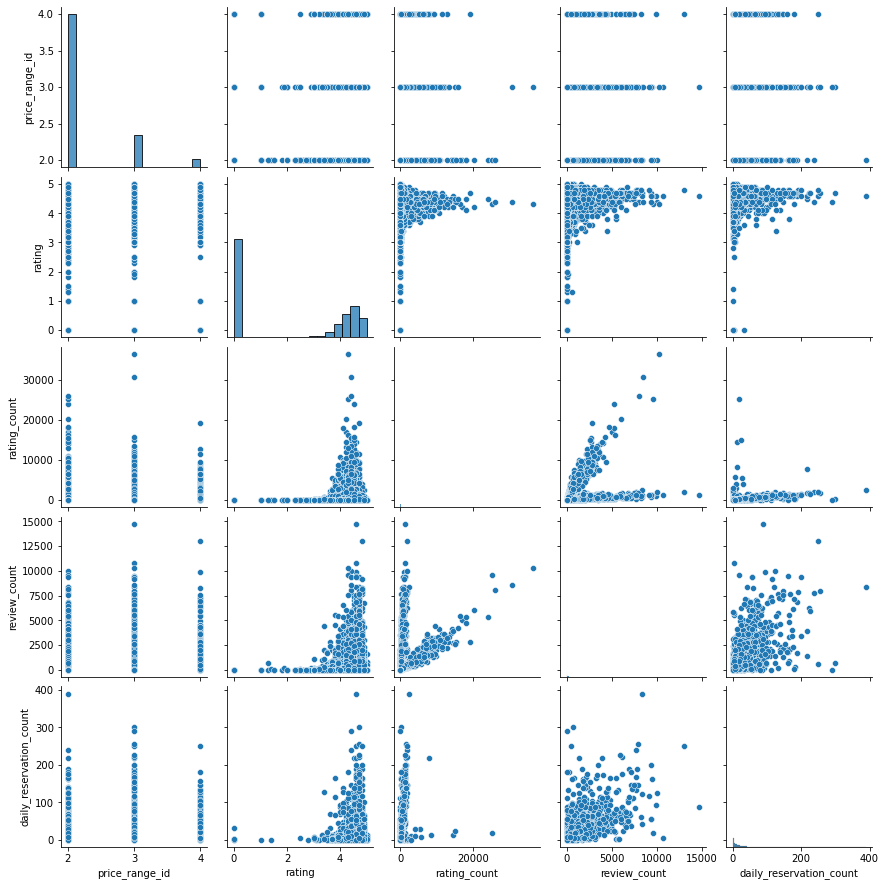

In [188]:
# Creating a pairplot for already numeric columns in dataframe
import seaborn as sns
pairplot_cols: list[str] = [
    "price_range_id",
    "rating",
    "rating_count",
    "review_count",
    "daily_reservation_count",
]
sns.pairplot(df[pairplot_cols])


In [189]:
# ✏️ YOUR CODE HERE - may require encoding categorical string variables

In [190]:
df.head(5)

country   subregion          city                   brand_name  \
0  United States  California   Los Angeles          Luv2Eat Thai Bistro   
1  United States  California  Sherman Oaks          Jerry's Famous Deli   
2  United States  California      Pasadena                Terrace Sushi   
3  United States  California      Pasadena  Hamburger Hamlet - Pasadena   
4  United States  California       Burbank           Centanni - Burbank   

                categories   latitude   longitude          area  \
0                   [Thai]  34.097510 -118.335921     Hollywood   
1               [American]  34.154596 -118.448700  Sherman Oaks   
2                [Spanish]  34.145800 -118.142900      Pasadena   
3  [Contemporary American]  34.137800 -118.132300      Pasadena   
4                [Italian]  34.174018 -118.317323       Burbank   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   
2  443 E Colorado Blvd, , CA, Pasadena, 91101, Un...   
3  214 S Lake Ave, , CA, Pasadena, 91101, United ...   
4  117 N. Victory Blvd, , CA, Burbank, 91502, Uni...   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   
2  [{'name': 'Main Menu', 'sections': [{'name': '...   
3  [{'name': 'Main Menu', 'sections': [{'name': '...   
4  [{'name': 'Main Menu', 'sections': [{'name': '...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  Feast on delicious grub at Jerry's Famous Deli...           None   
2  Terrace Sushi serves Japanese cuisines to its ...           None   
3  Hamburger Hamlet serves traditional American c...           None   
4  WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY. PLEA...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   
2         None                              None  (626) 584-0503   
3         None                              None  (626) 449-8520   
4        Clark        http://www.centannila.com/  (818) 561-4643   

         primary_cuisine   dining_style executive_chef_name    parking_info  \
0                   Thai  Casual Dining                None  Street Parking   
1               American  Casual Dining                None            None   
2                Spanish  Casual Dining                None            None   
3  Contemporary American  Casual Dining                None            None   
4                Italian  Casual Dining        Marin Santos     Private Lot   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   
2  Business Casual          None   
3  Business Casual          None   
4     Casual Dress          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   
2                                               None               2   
3                                               None               2   
4  Dinner\nMon–Thu 5:00 pm–8:30 pm\nFri, Sat 5:00...               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   
2  $30 and under                                  []   
3  $30 and under                                  []   
4  $30 and under  [AMEX, Discover, MasterCard, Visa]   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90     4.6           136   
1                                    90     0.0      

In [191]:
for i in df.columns:
    print(i,':',len(df[i].astype('str').unique()),'  Percent :',round((len(df[i].astype('str').unique())/len(df))*100))

country : 1   Percent : 0
subregion : 1   Percent : 0
city : 762   Percent : 4
brand_name : 17543   Percent : 96
categories : 3769   Percent : 21
latitude : 17421   Percent : 95
longitude : 17563   Percent : 96
area : 566   Percent : 3
address : 9618   Percent : 53
menu : 15768   Percent : 86
description : 11825   Percent : 65
public_transit : 1888   Percent : 10
cross_street : 5013   Percent : 27
restaurant_website : 13209   Percent : 72
phone_number : 17558   Percent : 96
primary_cuisine : 179   Percent : 1
dining_style : 5   Percent : 0
executive_chef_name : 4169   Percent : 23
parking_info : 6   Percent : 0
dress_code : 7   Percent : 0
entertainment : 1323   Percent : 7
operating_hours : 7688   Percent : 42
price_range_id : 3   Percent : 0
price_range : 3   Percent : 0
payment_options : 63   Percent : 0
maximum_days_advance_for_reservation : 44   Percent : 0
rating : 36   Percent : 0
rating_count : 1856   Percent : 10
rating_by_feature : 5041   Percent : 28
rating_distribution : 81

In [192]:
df_3=df.copy()

In [193]:
df_3=df_3.select_dtypes('object','bool')

In [194]:
df_3=df_3.astype('str')

In [195]:
unique_ser = df_3.apply(lambda col: col.nunique(), axis=0)

In [196]:
to_drop_col=unique_ser[(unique_ser/len(df))*100>21]

In [197]:
dro=pd.DataFrame(to_drop_col).index

In [198]:
df_3=df_3.drop(['country','subregion'],axis=1)

In [199]:
df_3=df_3.drop(dro,axis=1)

In [200]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_3=df_3.apply(LabelEncoder().fit_transform)

In [201]:
df_int=df.select_dtypes(['int64','float64'])

In [202]:
df_corr=pd.concat([df_3,df_int],axis=1)

In [203]:
df_corr.corr()

city  categories      area  \
city                                  1.000000    0.009923  0.727083   
categories                            0.009923    1.000000  0.007790   
area                                  0.727083    0.007790  1.000000   
public_transit                       -0.022107    0.009105  0.004989   
primary_cuisine                       0.011311    0.989909  0.006935   
dining_style                          0.015924    0.042000 -0.023332   
parking_info                          0.044760    0.015706 -0.013622   
dress_code                            0.019097   -0.030117 -0.014967   
entertainment                        -0.009727    0.002732  0.003262   
price_range                           0.020823    0.010260 -0.011750   
payment_options                      -0.032728   -0.010681  0.015720   
review_topics                        -0.029819    0.025312  0.004851   
awards                               -0.003066    0.074097 -0.017380   
experiences                           0.004702   -0.004888 -0.005077   
editorial_lists                       0.044755    0.034899 -0.004113   
checklist                            -0.004500    0.001268  0.007327   
safety_precautions                   -0.002675   -0.013746  0.022296   
order_online_link                     0.012329    0.004157  0.007830   
popular_dishes                        0.022352    0.030953 -0.008961   
latitude                              0.096028   -0.000782  0.122867   
longitude                            -0.095564   -0.017527 -0.094975   
price_range_id                        0.020823    0.010260 -0.011750   
maximum_days_advance_for_reservation -0.005202    0.082723 -0.020304   
rating                                0.033904    0.006565 -0.008365   
rating_count                          0.041521   -0.005008  0.000298   
review_count                          0.031478    0.031165 -0.018677   
daily_reservation_count               0.033556    0.049474 -0.035056   
restaurant_id                         0.005838   -0.010305  0.002305   

                                      public_transit  primary_cuisine  \
city                                       -0.022107         0.011311   
categories                                  0.009105         0.989909   
area                                        0.004989         0.006935   
public_transit                              1.000000         0.001352   
primary_cuisine                             0.001352         1.000000   
dining_style                               -0.101349         0.050409   
parking_info                               -0.179556         0.034333   
dress_code                                 -0.116130        -0.017956   
entertainment                               0.009417        -0.000682   
price_range                                -0.134698         0.021665   
payment_options                             0.170348        -0.037952   
review_topics                               0.127396         0.008379   
awards                                     -0.162731         0.083904   
experiences                                -0.076469         0.000714   
editorial_lists                            -0.121084         0.046775   
checklist                                   0.094177        -0.018889   
safety_precautions                          0.135284        -0.029882   
order_online_link                          -0.077758         0.009038   
popular_dishes                             -0.136353         0.040396   
latitude                                   -0.013242         0.003053   
longitude                                   0.023329        -0.021215   
price_range_id                             -0.134698         0.021665   
maximum_days_advance_for_reservation       -0.061420         0.091941   
rating                                     -0.205251         0.031914   
rating_count                               -0.046541        -0.000577   
review_count                               -0.077713   

<AxesSubplot:>

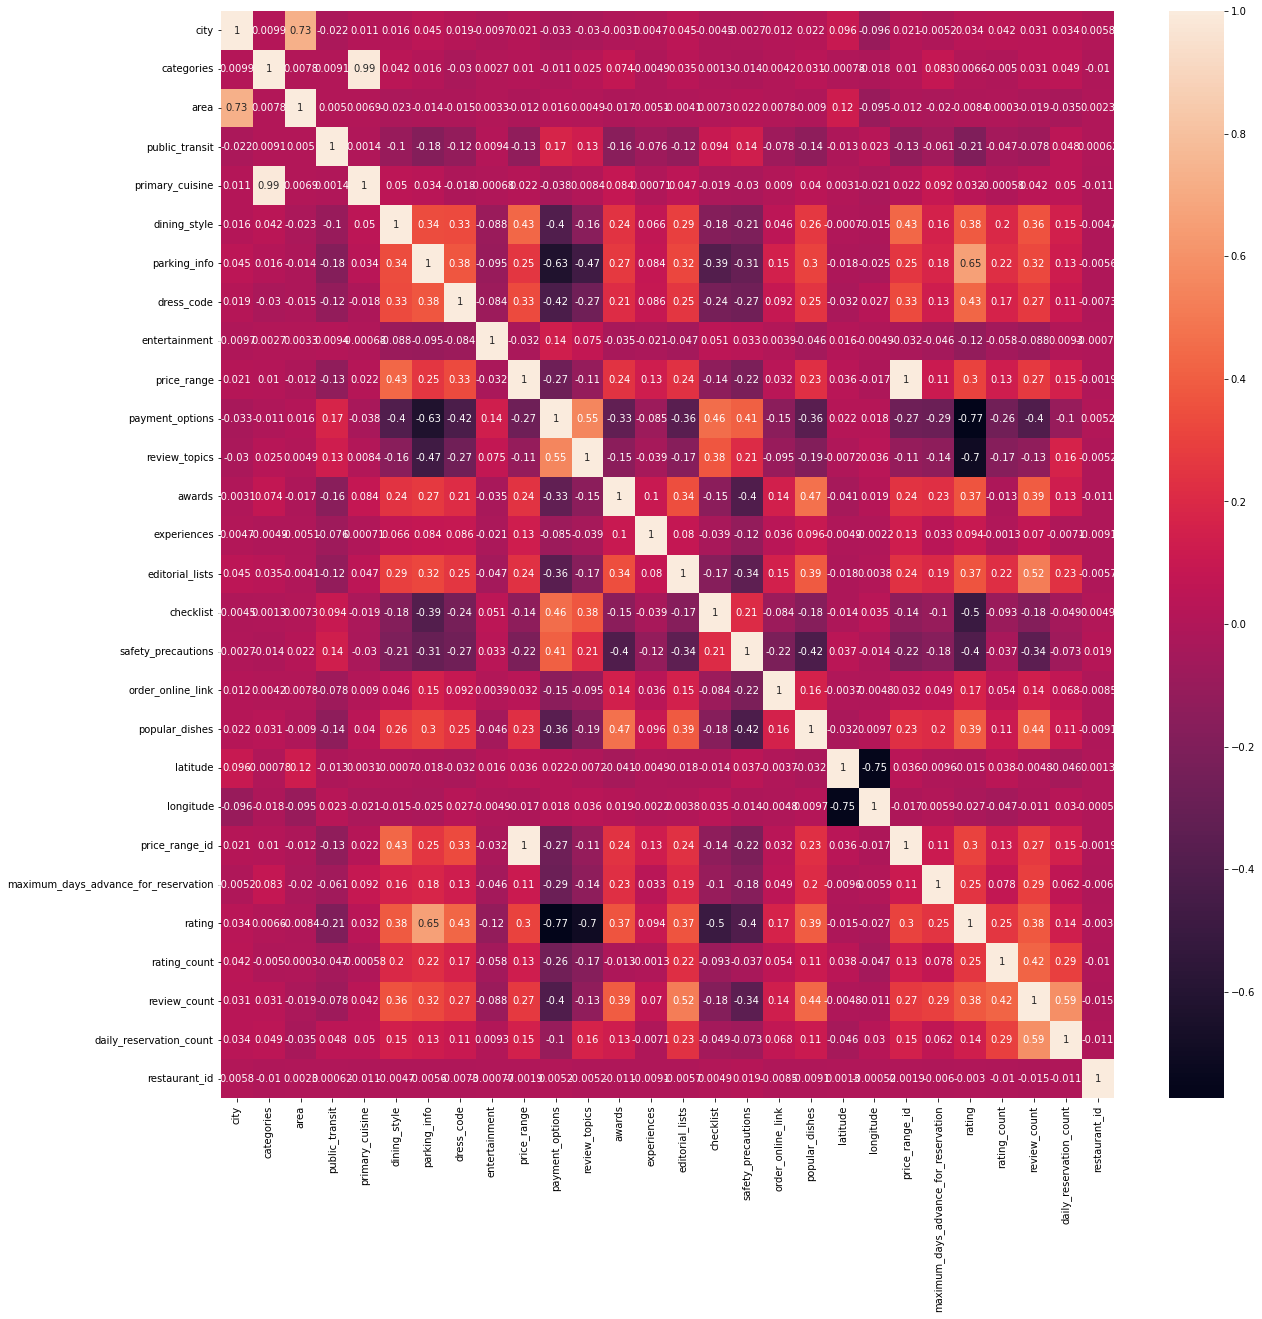

In [204]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df_corr.corr(),annot=True)

In [205]:
import numpy as np
# Create correlation matrix
corr_matrix = df_corr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features 
#df_corr.drop(to_drop, axis=1, inplace=True)

In [206]:
print('These columns were highly corelated and can be treated as redudant',to_drop)

These columns were highly corelated and can be treated as redudant ['primary_cuisine', 'price_range_id']


# Country and subregion were eliminated in the beginning as they only had one value.

---

Good job!

<img src="https://media.giphy.com/media/qLhxN7Rp3PI8E/giphy.gif" height="250px" width="250px" alt="legend of zelda">